In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


# Problem Statement:
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car

# Business Goal:
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# This Notebook will cover the following:
* Understanding the data
* Data cleaning
* Exploratory Data Analysis
* Feature selection using Recursive Feature elimination(RFE)
* Identify multicollinearity assumption for all numerical features by pairplot
* Data Modelling and evaluation
* Conclusion

**If this Kernel helped you in any way, some UPVOTES would be very much appreciated**

# 1. Understanding the Data


In [2]:
#loading data
df = pd.read_csv("/kaggle/input/car-price-prediction/CarPrice_Assignment.csv")


In [3]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
## information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# unique value of each column
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [7]:
# description of the data
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


It is clear that the database has no null values. It has 10 categorical and 18 numerical columns.

# 2. Data Cleaning

In [8]:
# Droping car_ID from the database
df=df.drop(['car_ID'],axis=1)

In [9]:
# Extracting Car Company from the CarName
df['CarName']=df['CarName'].str.split(' ').str[0]

In [10]:
# Unique Car company
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Typo Error in Car Company name

* maxda = mazda
* Nissan = nissan
* porsche = porcshce
* toyota = toyouta
* vokswagen = volkswagen = vw

In [11]:
# Renaming the typo errors in Car Company names

df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [12]:
# Changing the datatype of symboling as it is categorical variable
df['symboling']=df['symboling'].astype('str')

In [13]:
# Numerical and Categorical Columns
numerical_columns=df.select_dtypes(exclude=['object']).columns
categorical_columns=df.select_dtypes(include=['object']).columns

# 3. Exploratory Data Analysis

Here we will identify if some predictors directly have a strong association with the outcome variable price

<Axes: xlabel='count', ylabel='CarName'>

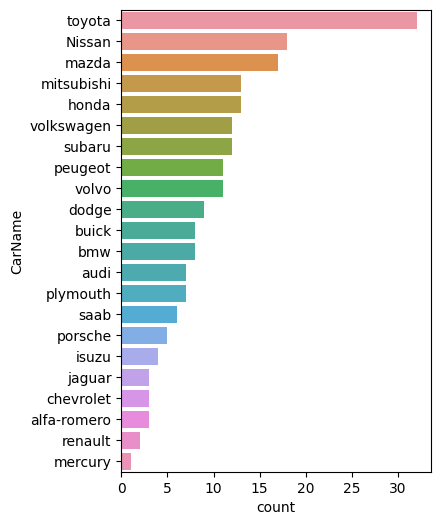

In [14]:
# Visualizing the most popular car in the database
plt.figure(figsize=(4,6))
order = df['CarName'].value_counts().index
sns.countplot(y='CarName',order=order,data=df)

Toyota seems to be the most favoured cars and Mercury seems to be the least favoured cars.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

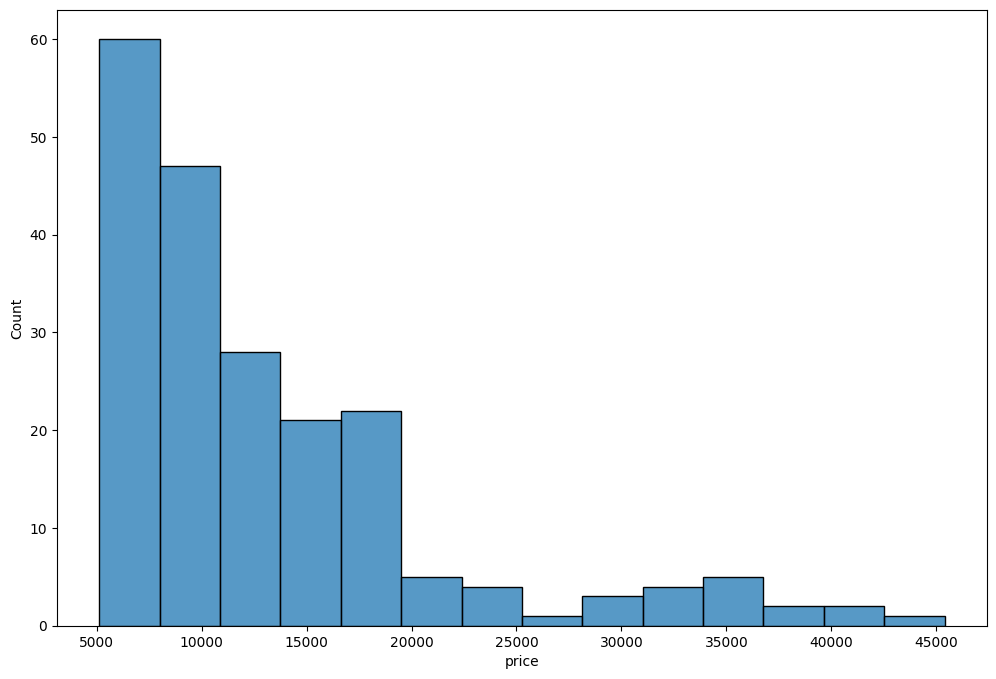

In [15]:
# Visualizing the most expensive car in the database
plt.figure(figsize=(12,8))
sns.histplot(df['price'])

In [16]:
#The plots seems to be right skewed, the prices of almost all cars looks like less than 18000.

In [17]:
# Correlation Matrix in numeric variable
Corr_mat=df[numerical_columns].corr()

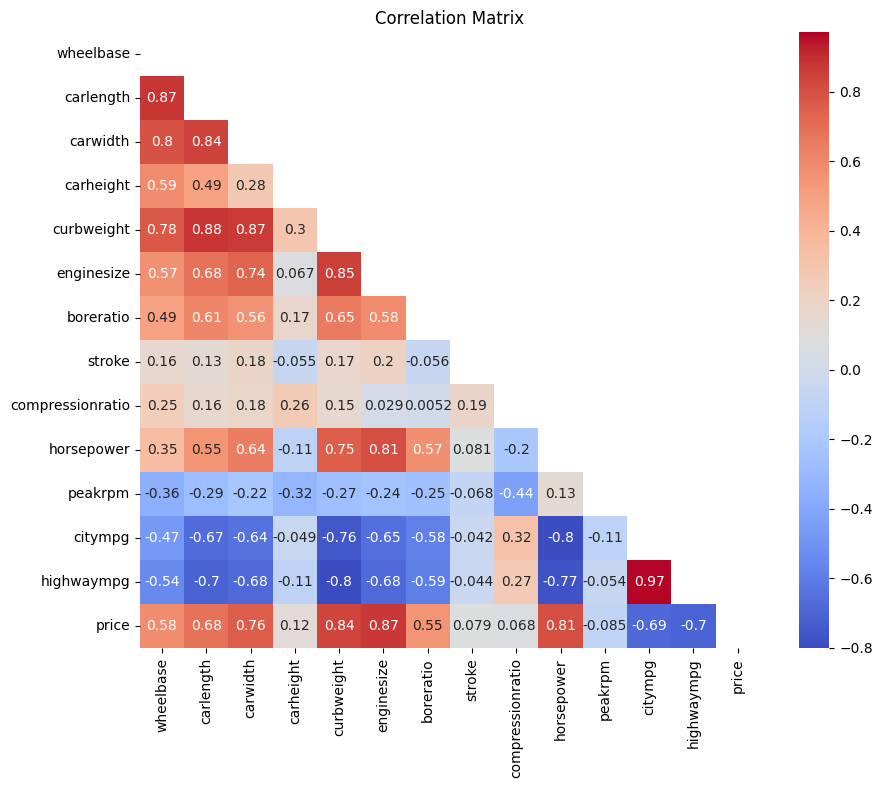

In [18]:
# Visualize the correlation matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))
mask=np.triu(np.ones_like(Corr_mat))
sns.heatmap(Corr_mat, annot=True, cmap='coolwarm',mask=mask)
plt.title('Correlation Matrix')
plt.show()

**Findings:**
* carwidth , carlength, curbweight ,enginesize ,horsepower seems to have a positive correlation with price.

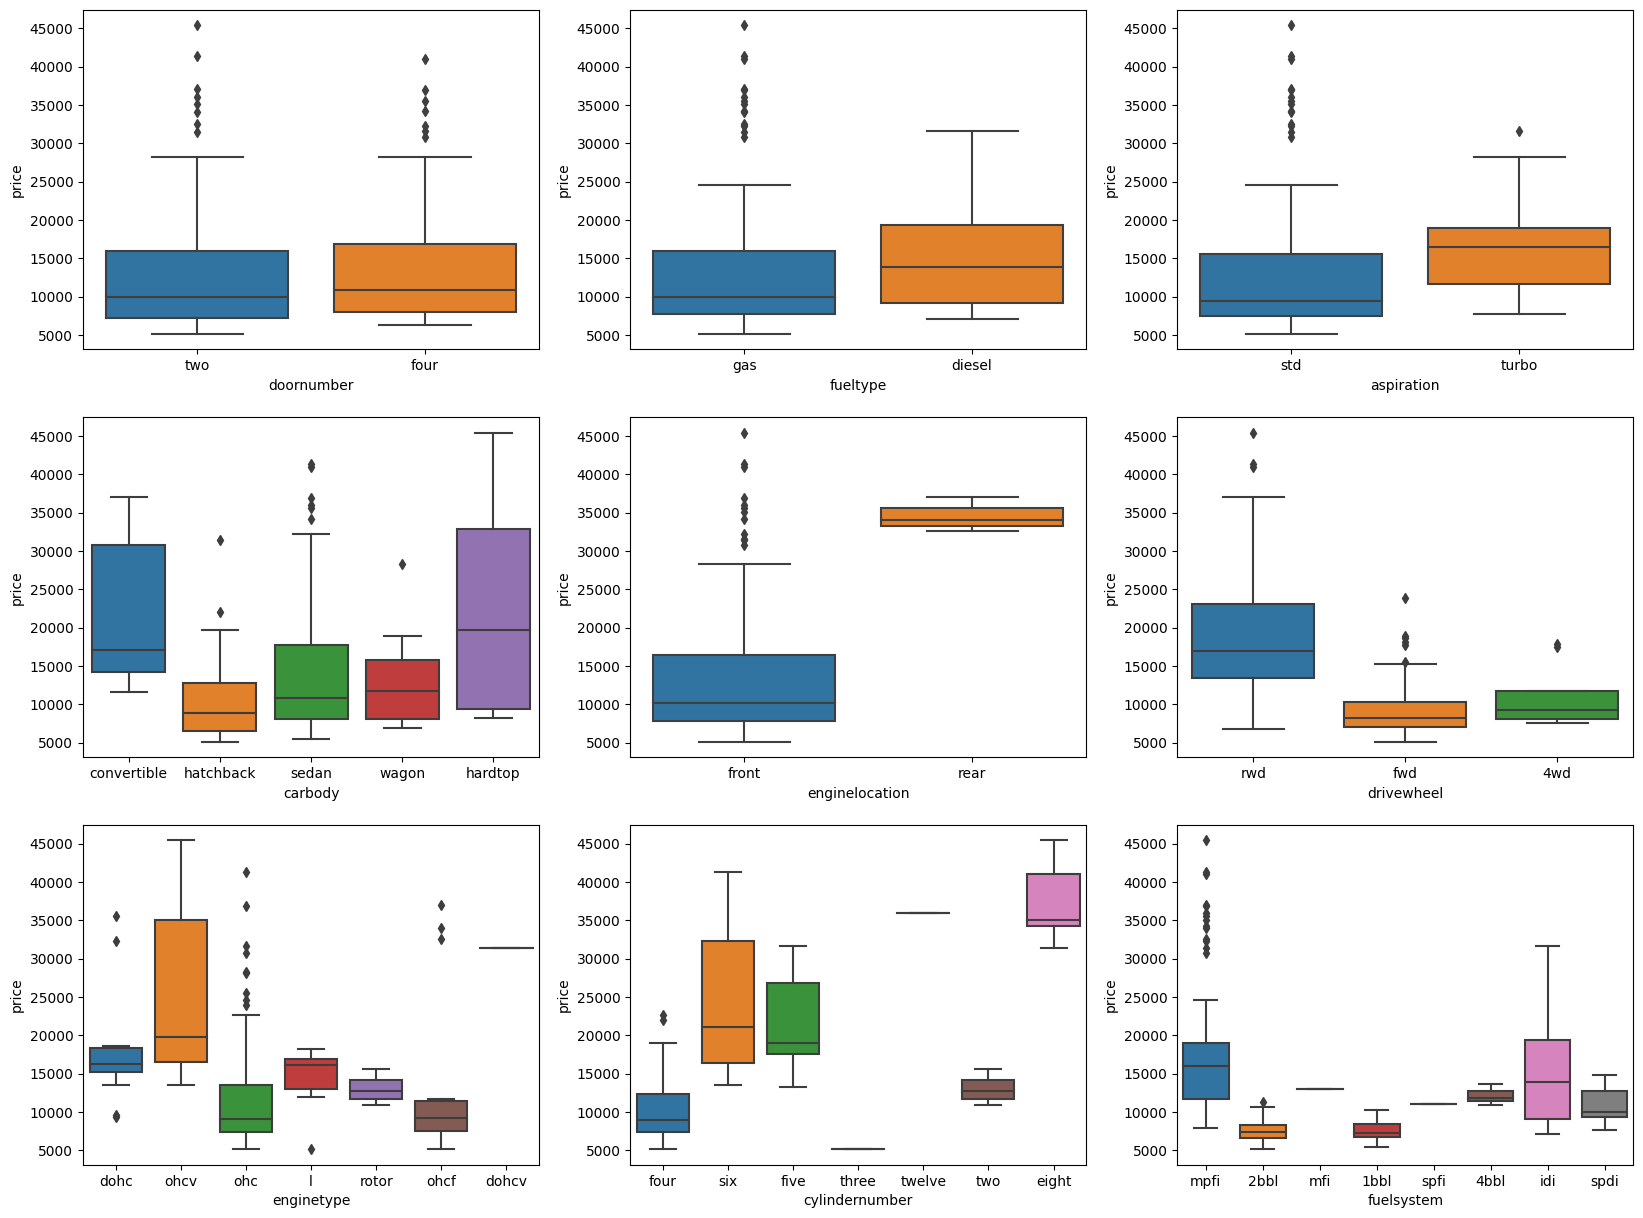

In [19]:
#Boxplot of all the categorical variables
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.show()


**Findings:**
* Diesel fueltype cars are comparatively expensive than the cars with fueltype as gas.
* All the types of carbody is relatively cheaper as compared to convertible and hardtop carbody.
* The cars with rear enginelocation are way expensive than cars with front enginelocation.
* rwd drivewheel car price is always very high.
* Enginetype ohcv comes into higher price range cars.
* The price of car is directly proportional to no. of cylinders in most cases.

# 4. Feature selection using Recursive Feature elimination(RFE)

Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.

In [20]:
X=df[numerical_columns].drop('price',axis=1)
y=df['price']

In [21]:
# Create the RFE object
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Create a base model (Random Forest)
model = RandomForestRegressor()

# Create the RFE model and select 5 features
rfe = RFE(estimator=model, n_features_to_select=5,step=1)
rfe_fit = rfe.fit(X, y)
X.columns[rfe.support_]
feature=X.columns[rfe.support_]
print(feature)

Index(['carwidth', 'curbweight', 'enginesize', 'horsepower', 'highwaympg'], dtype='object')


# 5. Identify multicollinearity assumption for all numerical features by pairplot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

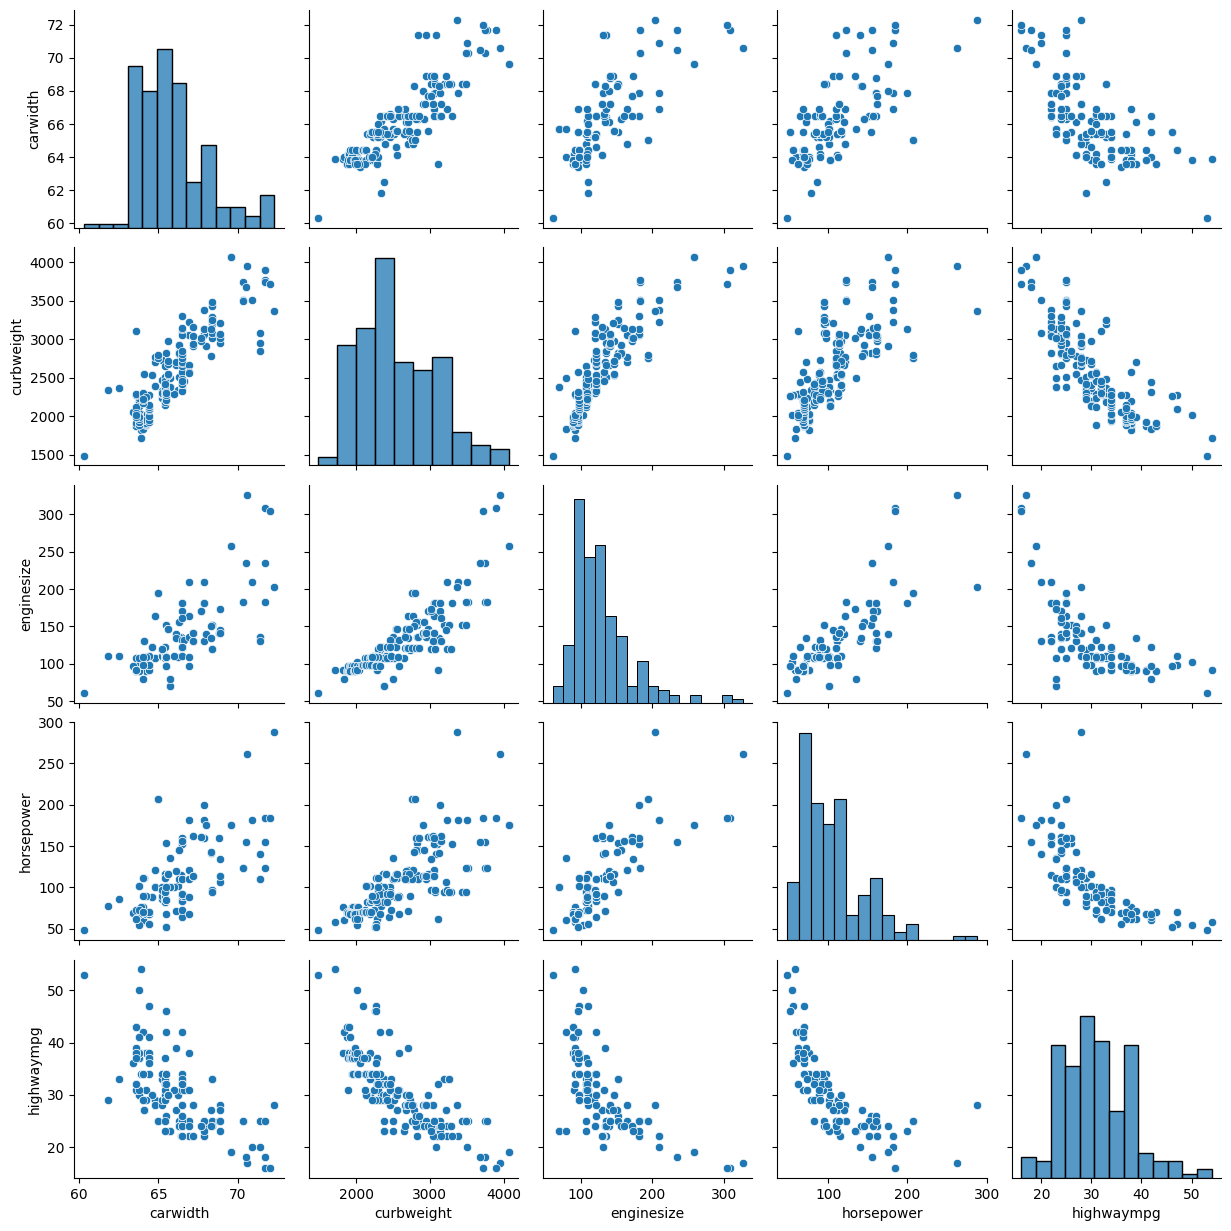

In [22]:
#Finding correlation amoung numerical variables
ax = sns.pairplot(df[feature])

# 6. Data Modelling and evaluation

 **Decission Tree**

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

#Specify Prediction Target
y=df.price
feature=X.columns[rfe.support_]
X=df[feature]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [24]:
#specify the model. 
model_1 = DecisionTreeRegressor(random_state=0)

# Fit the model
model_1.fit(X_train,y_train)

#Predict the model
dtr_test = model_1.predict(X_test)


#Evaluate the model R² score (Coefficient of Determination) on the test set
dtr_score=r2_score(y_test,dtr_test)
print('Coefficient of Determination',dtr_score)

#Mean absolute error
dtr_mae=mean_absolute_error(y_test,dtr_test)
print('Mean absolute error',dtr_mae)

Coefficient of Determination 0.8652695629128241
Mean absolute error 2242.6346153846152


**Random Forest**

In [25]:
from sklearn.ensemble import RandomForestRegressor

#specify the model. 
model_2 = RandomForestRegressor(random_state=0)

# Fit the model
model_2.fit(X_train,y_train)

#Predict the model
rfrs_test = model_2.predict(X_test)

#Evaluate the model R² score (Coefficient of Determination) on the test set
rfrs_score=r2_score(y_test,rfrs_test)
print('Coefficient of Determination',rfrs_score)

#Mean absolute error
rfrs_mae=mean_absolute_error(y_test,rfrs_test)
print('Mean absolute error',rfrs_mae)

Coefficient of Determination 0.9093050061367137
Mean absolute error 1820.418013782051


**Linear Regression**

In [26]:
from sklearn.linear_model import LinearRegression

#specify the model. 
model_3 = LinearRegression()

# Fit the model
model_3.fit(X_train,y_train)

#Predict the model
lr_test = model_3.predict(X_test)

#Evaluate the model R² score (Coefficient of Determination) on the test set
lr_score=r2_score(y_test,lr_test)
print('Coefficient of Determination',lr_score)

#Mean absolute error
lr_mae=mean_absolute_error(y_test,lr_test)
print('Mean absolute error',lr_mae)

Coefficient of Determination 0.816236942651709
Mean absolute error 2707.363257557582


**XGBoost**

In [27]:
from xgboost import XGBRegressor

#specify the model. 
model_4 = XGBRegressor()

# Fit the model
model_4.fit(X_train,y_train)

#Predict the model
xgb_test = model_4.predict(X_test)

#Evaluate the model R² score (Coefficient of Determination) on the test set
xgb_score=r2_score(y_test,xgb_test)
print('Coefficient of Determination',xgb_score)

#Mean absolute error
xgb_mae=mean_absolute_error(y_test,xgb_test)
print('Mean absolute error',xgb_mae)

Coefficient of Determination 0.8971449243532165
Mean absolute error 1924.6631328876201


# 7. Conclusion
* We have applied 4 models Linear Regression,Decision Tree Regressor,RandomForest Regressor and XGBoost
* As we can see random forest has performed best (with accuracy ~ 0.90)
* Hence, We can say that our model is good enough to predict the Car prices using these 5 predictor variables carwidth', 'curbweight', 'enginesize', 'horsepower', 'highwaympg'.     

**If this Kernel helped you in any way, some UPVOTES would be very much appreciated**